In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [4]:
def heatMap(prefix, vals, ylabel=""):
    norm = mpl.colors.Normalize(vmin=30, vmax=160)
    # mappable = mpl.cm.ScalarMappable(norm=norm, cmap='viridis')

    data = []
    for s in vals:
        exp = []
        df = pd.read_json(prefix + s + '_results.json').to_numpy()
        for i in range(df.shape[1]):
            # ax1.scatter(np.ones((10))*i, df[:,i], s=50, alpha=0.5, c=df[:,i], cmap='magma', norm=norm)
            exp.append(df[:,i].mean())
        data.append(exp)

    fig, ax = plt.subplots()
    im = ax.imshow(data, cmap='inferno')


    ax.set_xticks(np.arange(10))
    ax.set_yticks(np.arange(len(vals)))

    ax.set_yticklabels(vals)
    ax.set_xlabel("cut number")
    ax.set_ylabel(ylabel)

    for i in range(len(vals)):
        for j in range(10):
            ax.text(j, i, "{:.0f}".format(data[i][j]), ha="center", va="center", color="black" if j>0 else "white")

    plt.show()

def customScatter(prefix, vals, titles=""):
    norm = mpl.colors.Normalize(vmin=30, vmax=160)
    cols = len(vals)
    fig = plt.figure(figsize=(3.33*cols,2))
    gs = fig.add_gridspec(1, cols, hspace=0, wspace=0.05)
    axs = gs.subplots(sharey=True)
    axs[0].set_ylabel("fitness")

    for l,s in enumerate(vals):
        axs[l].set_title(titles + s)
        axs[l].set_xticks(np.arange(10))
        for i in range(10):
            df = pd.read_json(prefix + s + '_results.json').to_numpy()
            axs[l].scatter(np.ones((df.shape[0]))*i, df[:,i], s=30, alpha=0.5, c=df[:,i], cmap='magma', norm=norm)
    plt.show()

def lineComparison(prefix, vals, title=""):
    from bokeh.palettes import Category10
    from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

    ax = plt.subplot()
    ax.set_xticks(np.arange(10))
    ax.set_ylabel("fitness")
    ax.set_xlabel("cut number")
    ax.set_title(title)

    exp = lambda x: (1.09)**(x)
    log = lambda x: np.log(x)/np.log(1.09)

    ax.set_yscale('function', functions=(exp, log))

    m = 0
    for l,s in enumerate(vals):
        means = []
        df = pd.read_json(prefix+s+'_results.json').to_numpy()
        for i in range(10):
            avg = np.nanmean(df[:,i])
            m = max(avg, m)
            means.append(avg)
        ax.plot(means, c=Category10[10][l], label=s, alpha=1, lw=2.5)

    mint = int(m)+1
    ax.set(xlim=(-0.3,9.3), ylim=(0, mint))
    ax.set_yticks([40]+np.arange( int(mint/5)*5-30,int(mint/5)*5+5,5).tolist()+[mint])
    ax.yaxis.set_minor_locator(MultipleLocator(1))
    ax.tick_params(which='major', length=5)
    ax.grid(b=True, which='major', linestyle='-')
    ax.grid(b=True, which='minor', linestyle=':')
    plt.legend()
    plt.show()

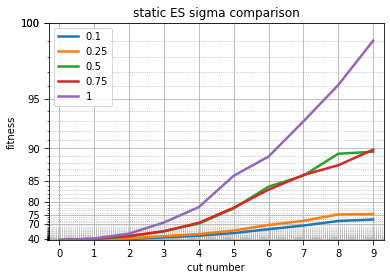

In [5]:
sigma = ['0.1','0.25','0.5','0.75','1']
prefix = 'Evolutionary Strategies wedge problem/static/sigma_'

# heatMap(prefix, sigma, ylabel="sigma")
lineComparison(prefix, sigma, title="static ES sigma comparison")

In [ ]:
tau = ['None', '0.1','0.2','0.5','1']
prefix = 'Evolutionary Strategies wedge problem/global/tau_'

# heatMap(prefix, tau, ylabel="tau")
lineComparison(prefix, tau, title="global ES tau comparison")